Software projects vs Number of Stars

Popularity of software projects is one of the important measures of trust whereb, for example, the number of github stars indicate number of developers who "watch" them.

To model this quantity to understand what causes some projects to have more stars we collect data from WoC on 
- project ID
- the project duration,
- from date,
- number of authors, 
- number of commits,
- number of Core Developers,
- number of commits by Top Developers
- number of stars.

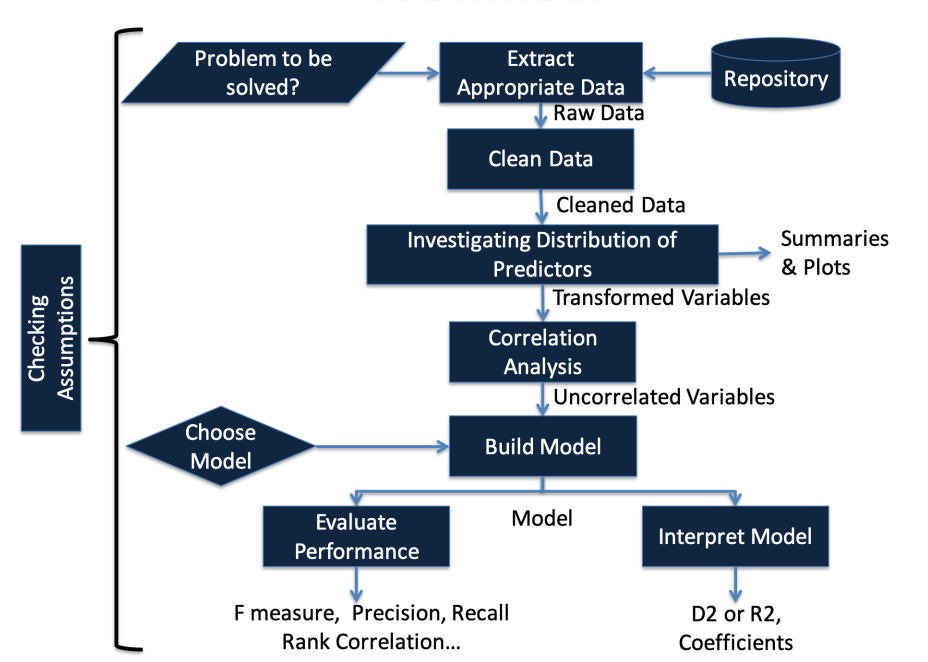


In [9]:
#------------------------------DATA EXTRACTION------------------------------

#Read data from the file and add the name for each of the columns
library(data.table) #quick reading
x=read.table("prjSU0",sep=";",quote="",comment.char="",nrows=100000) # 100K in scope
names(x) = c("p","dur","fr","na","nc","nCore","nc1","ns")
head(x) # Health check

original_x <- x

#ProjID, ProjDuration(sec), FromDate(sec,1970), NumAuthors, 
#NumCommits", NumCoreDevelopers", NumCommitsByTopDev, NumStar)


,p,dur,fr,na,nc,nCore,nc1,ns
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,0_...,178091295,1343607307,1,88,1,88,2
2,0_.vim,195591039,1326008034,1,106,1,106,2
3,0_Boltzmannizer,108457803,1386630382,2,17,1,15,1
4,0_DipoleChain.jl,68070613,1507327932,1,15,1,15,0
5,0_Eos,185669433,1251425611,5,55,1,45,17
6,0_JeszenszkiBasis.jl,127444807,1447960349,2,29,1,27,3


## There are two types of analysis that needs to be done
* the first one is about filtering by the outcomes. So, filtering the results by star rating. we have done that already below. 
* the second case is where we will use random varaibles that are outside of the predictor equation. in the predictor, we have used log of dur, nc, na, nCore. thus the outside variables are p (project id), fr (from date), nc1 (NumCommitsByTopDev)

In [2]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [10]:
data_frame_mod<-filter(x, nc1>100) # what happens? 
(data_frame_mod)
x <- data_frame_mod

p,dur,fr,na,nc,nCore,nc1,ns
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
0_.vim,195591039,1326008034,1,106,1,106,2
0_streaking-joel,15283251,1368432000,1,601,1,601,0
0--key_0--key.github.io,117823555,1458292674,1,345,1,345,0
0--key_lib,203994665,1409993201,3,1579,1,1577,0
0--key_org-pub,124204002,1451911714,1,816,1,816,0
0--key_pydepatt,4817538,1488915290,1,109,1,109,0
0-0-0-_StellarKit,42942881,1515043676,6,399,2,292,17
0-0-1_vscode-mcfunction,7288563,1508586187,3,155,1,124,2
0-0MrLonely_SourceCode,34820106,1531053667,2,128,1,120,3


Health check for imported data
![Screenshot%202021-12-15%20at%2018.51.17.png](attachment:Screenshot%202021-12-15%20at%2018.51.17.png)

In [11]:
#------------------------------CLEAN DATA------------------------------

# Completeness of data
colSums(is.na(x)) # check for empty fields


p   dur    fr    na    nc nCore   nc1    ns 
    0     0     0     0     0     0     0     0

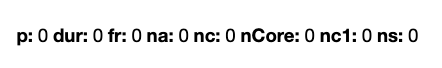

In [12]:
#------------------------------DATA ANALYSIS------------------------------

#Initial data validation
str(x) # Variables, Types, Factor, Quantities
summary(x) # Distribution, min, max, mead vs median, Q3 vs mean


'data.frame':	8417 obs. of  8 variables:
 $ p    : Factor w/ 100000 levels "0_...","0_.vim",..: 2 22 29 31 32 33 35 38 48 59 ...
 $ dur  : num  1.96e+08 1.53e+07 1.18e+08 2.04e+08 1.24e+08 ...
 $ fr   : int  1326008034 1368432000 1458292674 1409993201 1451911714 1488915290 1515043676 1508586187 1531053667 1238859570 ...
 $ na   : int  1 1 1 3 1 1 6 3 2 5 ...
 $ nc   : int  106 601 345 1579 816 109 399 155 128 118 ...
 $ nCore: int  1 1 1 1 1 1 2 1 1 1 ...
 $ nc1  : int  106 601 345 1577 816 109 292 124 120 105 ...
 $ ns   : int  2 0 0 0 0 0 17 2 3 90 ...


                       p             dur                  fr           
 0_.vim                 :   1   Min.   :8.641e+05   Min.   :4.973e+08  
 0_streaking-joel       :   1   1st Qu.:1.056e+07   1st Qu.:1.460e+09  
 0--key_0--key.github.io:   1   Median :2.988e+07   Median :1.519e+09  
 0--key_lib             :   1   Mean   :5.374e+07   Mean   :1.500e+09  
 0--key_org-pub         :   1   3rd Qu.:7.161e+07   3rd Qu.:1.560e+09  
 0--key_pydepatt        :   1   Max.   :1.128e+09   Max.   :1.612e+09  
 (Other)                :8411                                          
       na                 nc                nCore              nc1           
 Min.   :   1.000   Min.   :    101.0   Min.   :  1.000   Min.   :    101.0  
 1st Qu.:   1.000   1st Qu.:    142.0   1st Qu.:  1.000   1st Qu.:    123.0  
 Median :   2.000   Median :    202.0   Median :  1.000   Median :    162.0  
 Mean   :   4.559   Mean   :    674.4   Mean   :  1.699   Mean   :    543.4  
 3rd Qu.:   4.000   3rd Qu.:    34

Data is not properly distributed
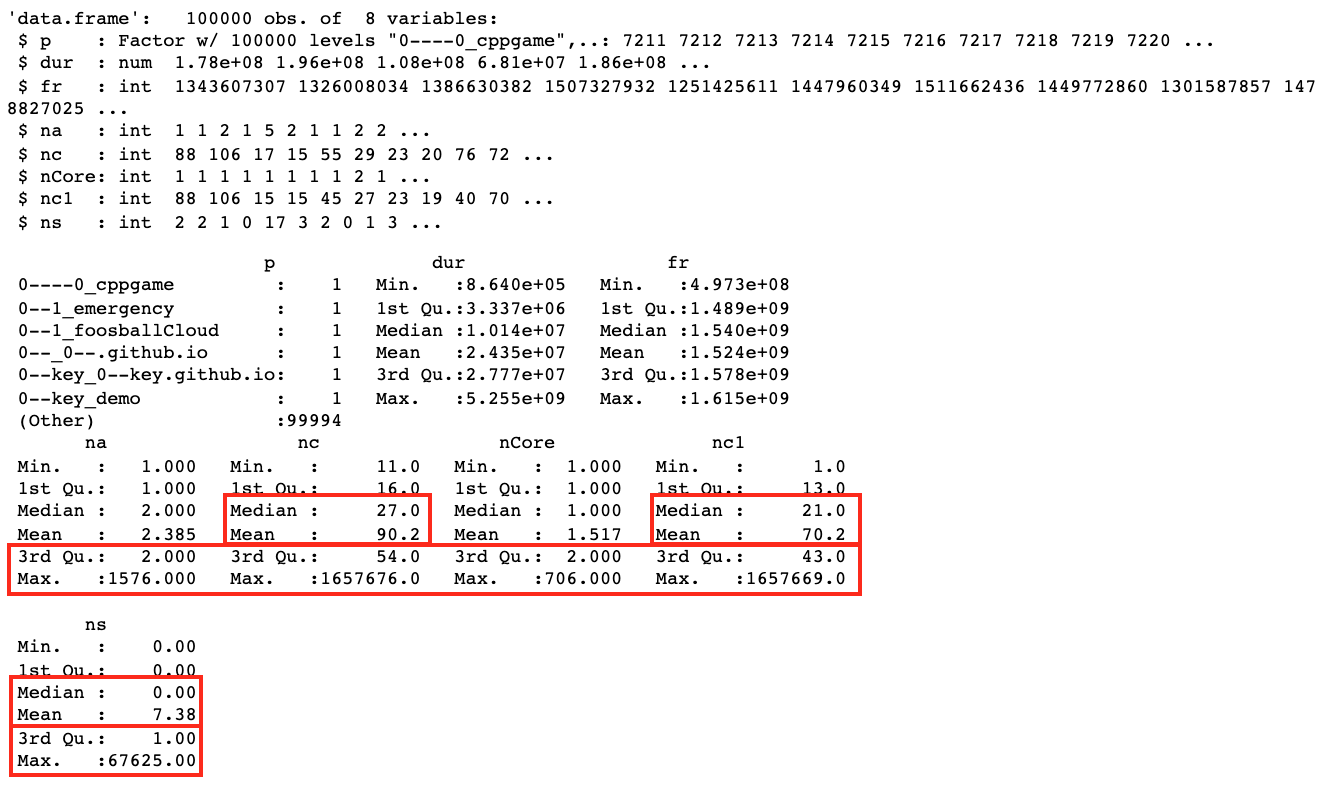

In [13]:
#------------------------------CORRELATION ANALYSIS------------------------------

# Execute correclation analysis based on collected data and analysis results
cor( as.data.frame(x[,c("ns","dur","na","nc","nCore","nc1")]), method="spearman" ) 
#The Spearman method was chosen based on the above findings.


,ns,dur,na,nc,nCore,nc1
ns,1.00000000,0.39244933,0.2569460,0.1491985,0.08283102,0.11804098
dur,0.39244933,1.00000000,0.2383194,0.2560809,0.05153934,0.25177598
na,0.25694603,0.23831936,1.0000000,0.4315665,0.65722905,0.11402242
nc,0.14919845,0.25608094,0.4315665,1.0000000,0.43792041,0.84735096
nCore,0.08283102,0.05153934,0.6572291,0.4379204,1.00000000,0.02213108
nc1,0.11804098,0.25177598,0.1140224,0.8473510,0.02213108,1.00000000


### As seen there, by adding the filtering mechanism on the number of stars. we found that nCore/na had reduced but correleation between changed. also, nc1 and nc has creased . Thus on one side it has incresed and on the other side it was reduxed. 

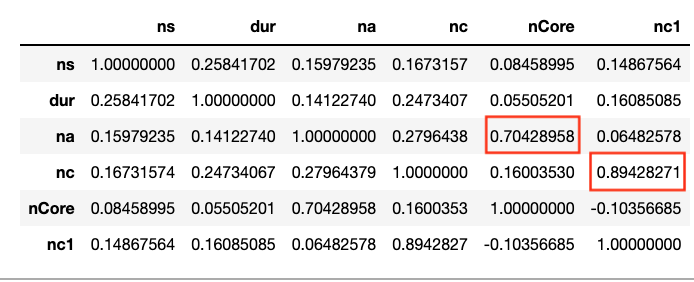

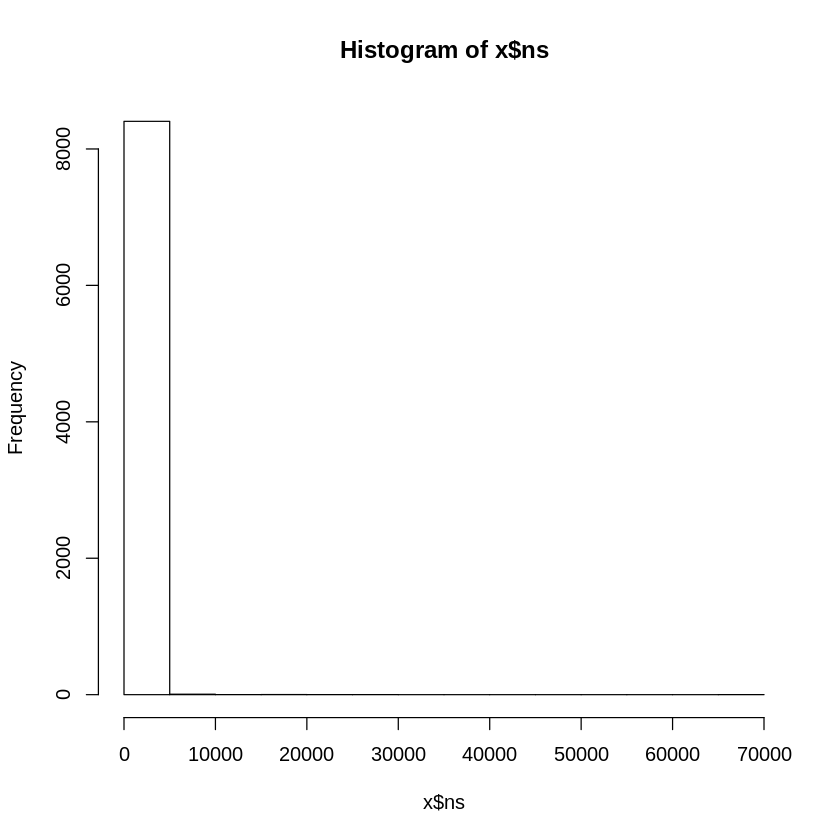

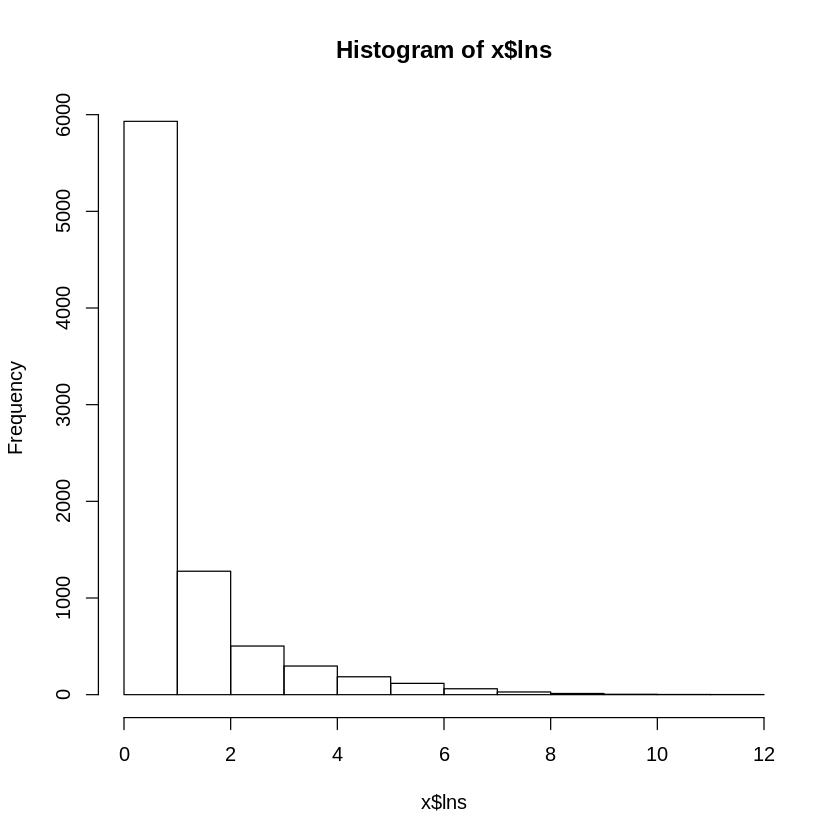

In [14]:
#------------------------------TRANSFORMATION------------------------------

#Calculate Logs
x$lns=log(x$ns+1);
x$ldur=log(x$dur+1);
x$lna=log(x$na+1);
x$lnc=log(x$nc+1);
x$lnCore=log(x$nCore+1);

# examples to see the difference
hist(x$ns)
hist(x$lns)

#Notes:
#1. Advantages: 1. narrow, 2.multiplicative model


In [19]:
#Randomly sample 100K repos
rr = 100000
rr = 6000
rk = 20000
rk = 1200
sel = sample(1:dim(x)[1],rr, replace = TRUE)

#first a smaller sample for analysis then a larger sample for matching
za=x[sel,][1:rk,]
zb=x[sel,][rk+1:rr,]


REGRESSION SELECTION

Apply applicable Regressions model based on previous results
- Simple Linear Regression (not applicable, too simple)
    lm(lns~ldur, data=za)
- Polynomial Regression (not applicable due to LOG transformation)
    lm(lns~ldur+I(ldur^2)+I(ldur^3), data=za)
- Multiple Linear Regression (most suitable)
    lm(lns~ldur+lnc+lna+lCore, data=za)
- Logistic Regression
    lm(lns~ldur+lnc+lna+lCore, family = binomial, data=za)



Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore, data = za, subset = za$na > 
    0)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1324 -0.7388 -0.2172  0.4038  5.3380 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.89545    0.50451  -7.721 2.42e-14 ***
ldur         0.25617    0.02837   9.028  < 2e-16 ***
lnc         -0.12618    0.04959  -2.545  0.01107 *  
lna          1.17769    0.08932  13.185  < 2e-16 ***
lnCore      -0.47775    0.15184  -3.146  0.00169 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.2 on 1195 degrees of freedom
Multiple R-squared:  0.3042,	Adjusted R-squared:  0.3019 
F-statistic: 130.6 on 4 and 1195 DF,  p-value: < 2.2e-16



Call:
lm(formula = lns ~ ldur + lnc + lnCore, data = za, subset = za$na > 
    0)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6779 -0.8096 -0.3018  0.3821  6.6221 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.1571828  0.5075761  -12.13   <2e-16 ***
ldur         0.3574999  0.0292211   12.23   <2e-16 ***
lnc          0.0005371  0.0520444    0.01    0.992    
lnCore       1.0550981  0.1044877   10.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.284 on 1196 degrees of freedom
Multiple R-squared:  0.203,	Adjusted R-squared:  0.201 
F-statistic: 101.5 on 3 and 1196 DF,  p-value: < 2.2e-16


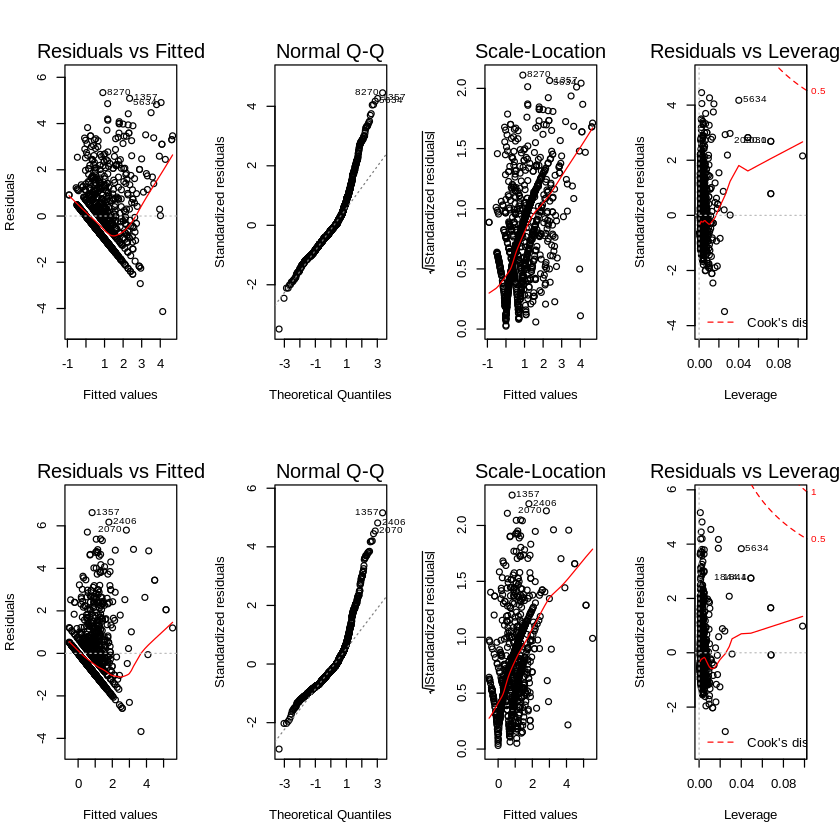

In [20]:
#-----------Linear Regression-----------

#Linear regression (least squares)
lim1=lm(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>0);
lim2=lm(lns~ldur+lnc+lnCore, data=za,subs=za$na>0);
summary(lim1)
summary(lim2)
par(mfrow=c(2,4))
plot(lim1)
plot(lim2)


#Notes
#Focus on 1. Adjusted R-squared, 2. lnCore


In [25]:
#projects with 300+ authors
lm300 = lm(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>300)
summary(lm300)

#projects with 10+ authors seem to offer good fit
lm9 = lm(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>9)
summary(lm9)

#does it change anything if we add nc1
lm8p = lm(lns~ldur+lnc+lna+lnCore+log(nc1), data=za,subs=za$na>9)
summary(lm8p)


Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore, data = za, subset = za$na > 
    30)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9248 -0.5875  0.3163  0.8318  2.6563 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.0945    13.6924   1.833 0.094026 .  
ldur         -1.0659     0.6750  -1.579 0.142655    
lnc          -2.1809     0.4721  -4.619 0.000741 ***
lna           5.7191     1.2557   4.555 0.000824 ***
lnCore       -3.0173     0.9089  -3.320 0.006834 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.563 on 11 degrees of freedom
Multiple R-squared:  0.7493,	Adjusted R-squared:  0.6581 
F-statistic: 8.218 on 4 and 11 DF,  p-value: 0.00254



Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore, data = za, subset = za$na > 
    9)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8411 -0.7021  0.0411  0.7892  4.3189 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.3701     2.7963  -1.563    0.122    
ldur          0.2648     0.1715   1.544    0.127    
lnc          -1.1112     0.2223  -4.999 3.68e-06 ***
lna           4.5578     0.5249   8.684 5.95e-13 ***
lnCore       -2.4841     0.4706  -5.278 1.22e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.662 on 75 degrees of freedom
Multiple R-squared:  0.6466,	Adjusted R-squared:  0.6278 
F-statistic: 34.31 on 4 and 75 DF,  p-value: 2.886e-16



Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore + log(nc1), data = za, 
    subset = za$na > 9)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8485 -0.8033 -0.1074  0.8698  4.1467 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.2501     2.8002  -1.518 0.133334    
ldur          0.2572     0.1718   1.497 0.138594    
lnc          -1.5616     0.5155  -3.030 0.003372 ** 
lna           4.3929     0.5520   7.959 1.55e-11 ***
lnCore       -2.1933     0.5584  -3.928 0.000191 ***
log(nc1)      0.5229     0.5397   0.969 0.335848    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.662 on 74 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6275 
F-statistic: 27.61 on 5 and 74 DF,  p-value: 1.152e-15


-----------Results/models assessment-----------

1. ANOVA
2. Regression assessment based on each indep elem.
3. Akaike Information Criterion, AIC

In [22]:
#ANOVA - dispersion analysis (hipotezes ivertinimas)

anova(lim1, test="Chi")
anova(lim1,lim2)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ldur,1,307.40219,307.402187,213.391218,1.367970e-44
lnc,1,26.61126,26.611261,18.472899,1.863533e-05
lna,1,404.28476,404.284761,280.644775,9.610138e-57
lnCore,1,14.26178,14.261785,9.900189,1.693448e-03
Residuals,1195,1721.46547,1.440557,NA,NA


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1195,1721.465,NA,NA,NA,NA
2,1196,1971.896,-1,-250.4309,173.8431,3.671142e-37


(Intercept)         ldur          lnc          lna       lnCore 
 2.907883663  0.002107717 -0.025211263  0.859038420 -0.371956391

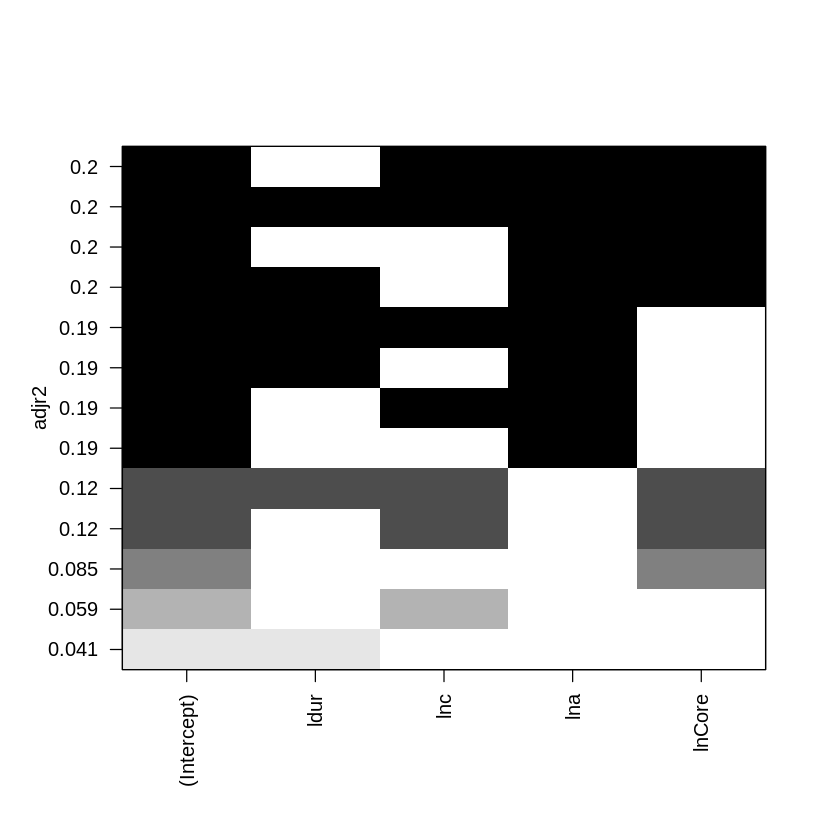

In [12]:
#Regression assessment

library(leaps)
leaps <- regsubsets(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>0, nbest=4)
# isveda n geriausiu modeliu 1 nepriklausomam kintam.
plot(leaps, scale="adjr2")

#Nepriklausomu koeficientu ivertinimas
coef(lim1) #kuo didesnis, tuo svarbesnis


In [13]:
#Akaike Information Criterion, AIC

AIC(lim1,lim2,lm300,lm9,lm8p)

Warning message in AIC.default(lim1, lim2, lm300, lm9, lm8p):
“models are not all fitted to the same number of observations”


,df,AIC
,<dbl>,<dbl>
lim1,6,58866.90573
lim2,5,60695.09878
lm300,6,66.78506
lm9,6,8377.67701
lm8p,7,8323.30587


In [14]:
#classificator, predicted
zpz=predict(lim1,zb)

#confusion table, actual classification
table(zpz>log(1),log(zb$ns+1)>log(1))
#table uses the cross-classifying factors to build a contingency table of the counts at each combination of factor levels.


      
        TRUE
  TRUE 80000